In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:

xtrain=pd.read_table('/Users/bomiao/Desktop/256Proj/UCIHARDataset/train/X_train.txt',delim_whitespace=True,header=None)
ytrain=pd.read_table('/Users/bomiao/Desktop/256Proj/UCIHARDataset/train/y_train.txt',header=None)

In [10]:
xtest=pd.read_table('/Users/bomiao/Desktop/256Proj/UCIHARDataset/test/X_test.txt',delim_whitespace=True,header=None)
ytest=pd.read_table('/Users/bomiao/Desktop/256Proj/UCIHARDataset/test/y_test.txt',header=None)

In [11]:
#converting into array
xtrain=xtrain.values 
xtest=xtest.values
ytrain=ytrain.values
ytest=ytest.values

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
knn = KNeighborsClassifier(n_neighbors = 24) #setting k= square root of 561

In [14]:
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [17]:
print (str(accuracy_score(ytest,ypred)*100) + '%')

90.22734984730234%


In [21]:
#Finding the optimal model by varying the no. of neighbors
scores = []
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    scores.append(accuracy_score(ytest,ypred))

/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/bomiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/Users/bomiao/anaconda3/lib/python3.7/site-p

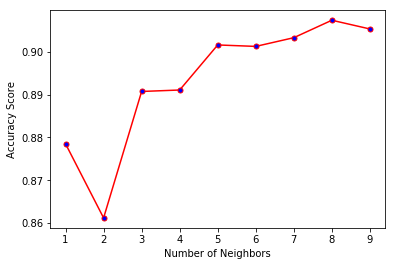

In [22]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,10)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)

In [23]:
scores = np.array(scores)

In [25]:
#Final result after training the model
print ('Optimal No. Of Neighbors: ', scores.argmax()+1)
print ('Accuracy Score: '+ str(scores.max()*100)+ '%')

Optimal No. Of Neighbors:  8
Accuracy Score: 90.73634204275535%
